Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

🎯 KNN Classification Results (K=1)
Accuracy: 0.473
F1 (macro): 0.149
F1 (weighted): 0.473

Classification Report:
              precision    recall  f1-score   support

           0      0.567     0.555     0.561      1293
           1      0.433     0.445     0.439      1020
           2      0.050     0.055     0.052       110
           3      0.056     0.054     0.055        56
           4      0.125     0.067     0.087        15
           5      0.000     0.000     0.000         2
      

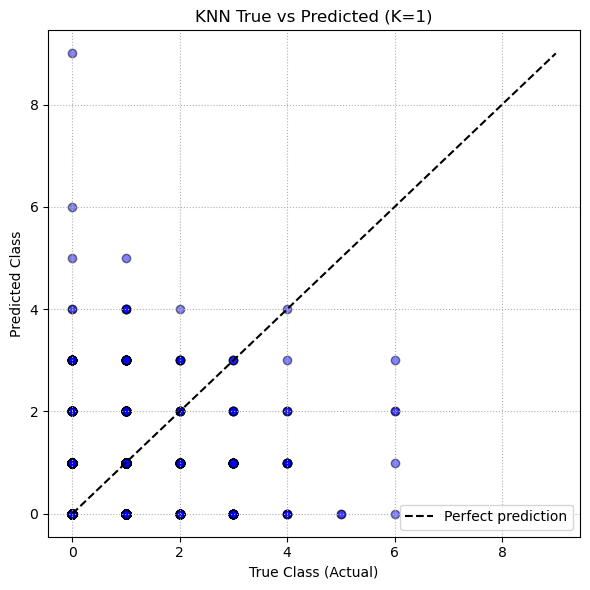

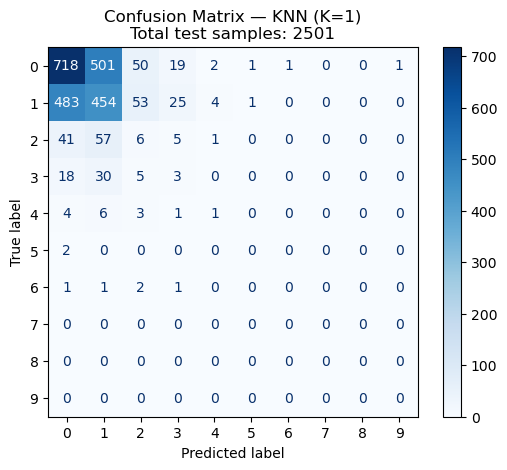


🎯 KNN Classification Results (K=5)
Accuracy: 0.500
F1 (macro): 0.152
F1 (weighted): 0.480

Classification Report:
              precision    recall  f1-score   support

           0      0.548     0.637     0.589      1293
           1      0.432     0.416     0.424      1020
           2      0.250     0.027     0.049       110
           3      0.000     0.000     0.000        56
           4      0.000     0.000     0.000        15
           5      0.000     0.000     0.000         2
           6      0.000     0.000     0.000         5

    accuracy                          0.500      2501
   macro avg      0.176     0.154     0.152      2501
weighted avg      0.470     0.500     0.480      2501



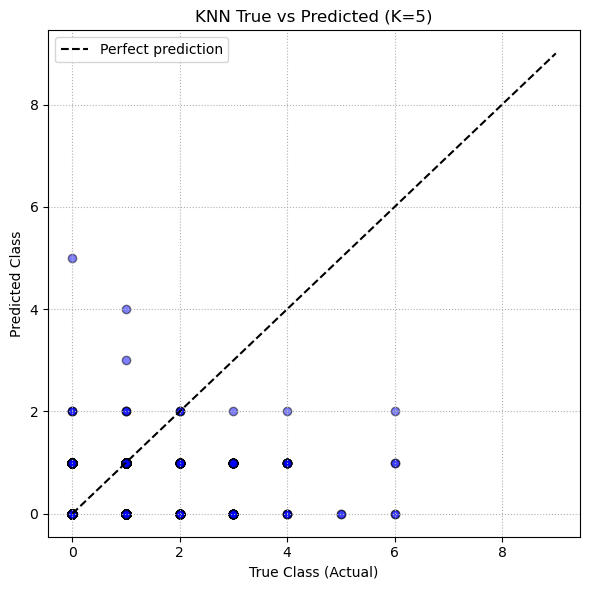

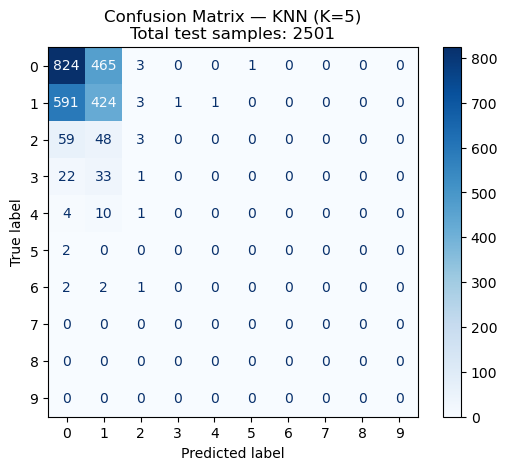


🎯 KNN Classification Results (K=9)
Accuracy: 0.524
F1 (macro): 0.158
F1 (weighted): 0.500

Classification Report:
              precision    recall  f1-score   support

           0      0.564     0.678     0.616      1293
           1      0.458     0.422     0.439      1020
           2      0.429     0.027     0.051       110
           3      0.000     0.000     0.000        56
           4      0.000     0.000     0.000        15
           5      0.000     0.000     0.000         2
           6      0.000     0.000     0.000         5

    accuracy                          0.524      2501
   macro avg      0.207     0.161     0.158      2501
weighted avg      0.497     0.524     0.500      2501



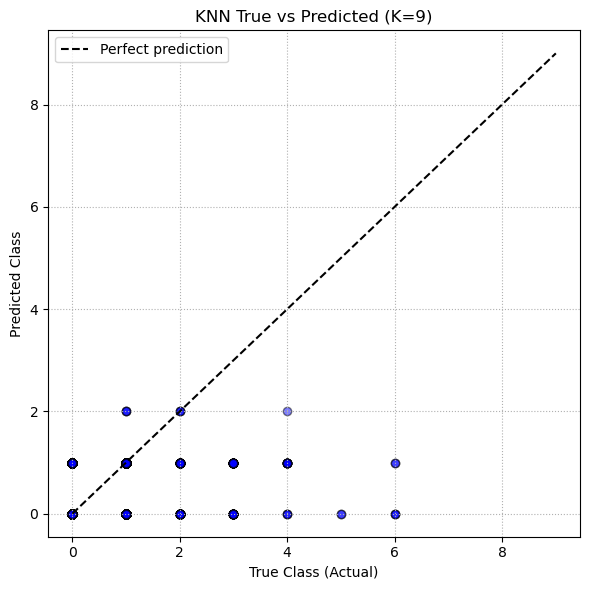

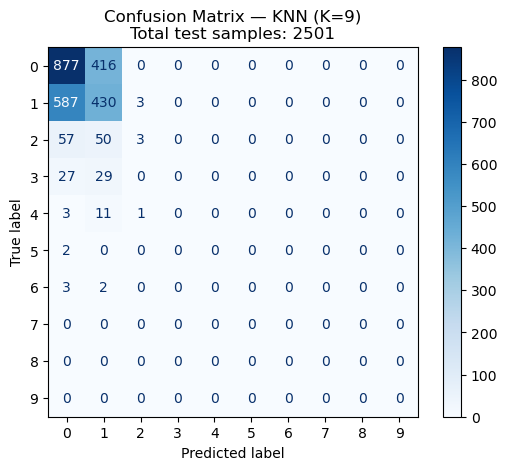

In [1]:
# ============================================================
# Poker Hand Classification — KNN (K=1, 5, 9 Comparison)
# ============================================================

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

# ============================================================
# Load dataset
# ============================================================
poker_df = pd.read_csv('poker-hand-training-true.data')
poker_df.columns = ['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5','ORD']

X = poker_df[['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5']]
y = poker_df['ORD']

# Split (8:1:1 ratio)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================
# Try multiple K values
# ============================================================
for k in [1, 5, 9]:
    print("\n" + "="*65)
    print(f"🎯 KNN Classification Results (K={k})")
    print("="*65)

    # Train model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict
    y_pred = knn.predict(X_test_scaled)

    # Accuracy and F1
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.3f}")
    print(f"F1 (macro): {f1_macro:.3f}")
    print(f"F1 (weighted): {f1_weighted:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    # ============================================================
    # Scatter plot (True vs Predicted)
    # ============================================================
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k')
    plt.plot([0,9],[0,9],'k--',label='Perfect prediction')
    plt.xlabel("True Class (Actual)")
    plt.ylabel("Predicted Class")
    plt.title(f"KNN True vs Predicted (K={k})")
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

    # ============================================================
    # Confusion Matrix
    # ============================================================
    cm = confusion_matrix(y_test, y_pred, labels=range(10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix — KNN (K={k})\nTotal test samples: {len(y_test)}")
    plt.show()


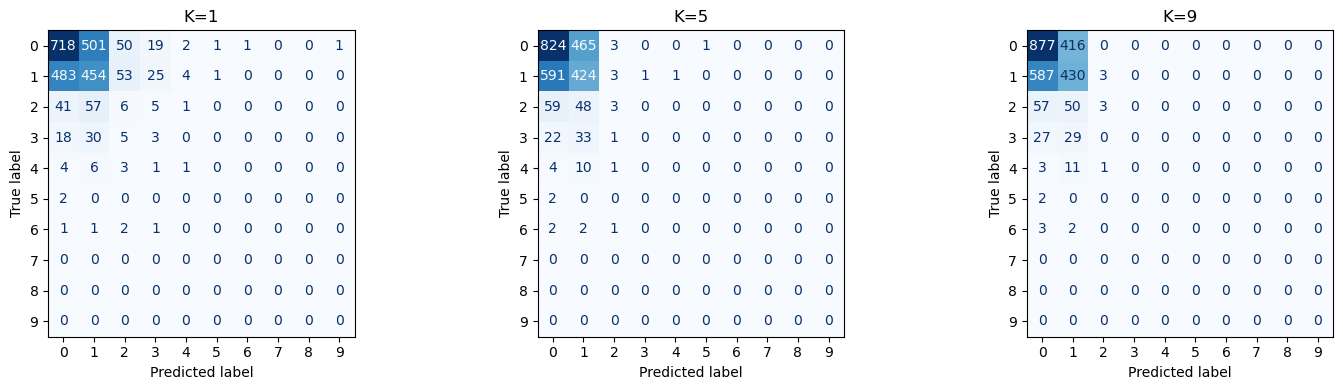

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {}
for k in [1, 5, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    models[k] = confusion_matrix(y_test, y_pred, labels=range(10))

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (k, cm) in enumerate(models.items()):
    disp = ConfusionMatrixDisplay(cm, display_labels=range(10))
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)
    axes[i].set_title(f"K={k}")
plt.tight_layout()
plt.show()
